In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


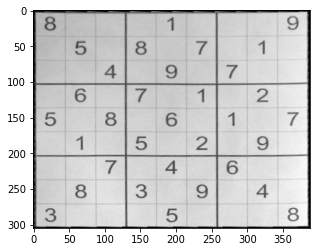

In [10]:
img = cv2.imread('warp_image.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')

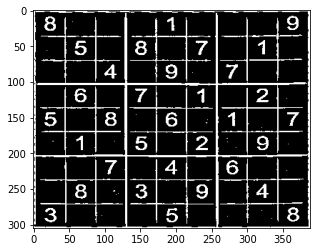

In [11]:
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,27,5)
plt.imshow(thresh,'gray')
thresh1 = thresh

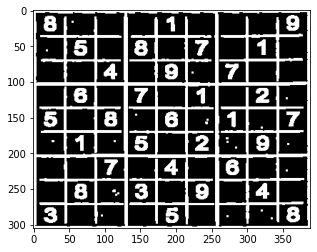

In [12]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(thresh1,kernel,iterations = 1)
plt.imshow(dilation,'gray')

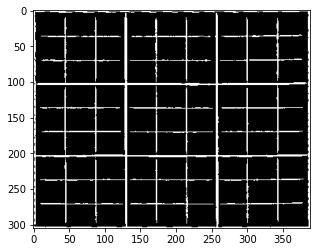

In [13]:

cnts = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 2000:
        cv2.drawContours(thresh1, [c], -1, (0,1,0), -1)

plt.imshow(thresh,'gray')

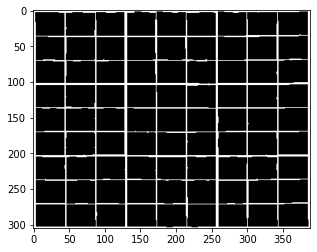

In [14]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, vertical_kernel, iterations=2)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, horizontal_kernel, iterations=2)
plt.imshow(thresh,'gray')

In [15]:
from imutils import contours

invert = 255 - thresh
cnts = cv2.findContours(invert, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="top-to-bottom")

sudoku_rows = []
row = []
for (i, c) in enumerate(cnts, 1):
    area = cv2.contourArea(c)
    if area < 2*invert.shape[0]//9*invert.shape[1//9]:
        row.append(c)
        if i % 9 == 0:  
            (cnts, _) = contours.sort_contours(row, method="left-to-right")
            sudoku_rows.append(cnts)
            row = []

In [16]:
i=0
for row in sudoku_rows:
    j=0
    for c in row:
        mask = np.zeros(img.shape, dtype=np.uint8)
        cv2.drawContours(mask, [c], -1, (255,255,255), -1)
        # result = cv2.bitwise_and(img, mask)
        
        result = np.zeros_like(img) # Extract out the object and place into output image
        result[mask == 255] = img[mask == 255]
        
        
        cv2.imshow('result',result)
        cv2.waitKey(0)
        
        y,x,_ = np.where(mask == 255)
        (topy, topx) = (np.min(y), np.min(x))
        (bottomy, bottomx) = (np.max(y), np.max(x))
        result = result[topy:bottomy+1, topx:bottomx+1]
        
        kernel = np.ones((1, 3), np.uint8)
        
        result = cv2.erode(result,kernel)
        cv2.imwrite('cells/'+str(i)+str(j)+'.jpg',result)
        j+=1
    i+=1

# cv2.imshow('thresh', thresh)
# cv2.imshow('invert', invert)
# cv2.waitKey(0)
cv2.destroyAllWindows()